In [1]:
import os
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
os.environ["PATH"] += os.pathsep + 'C:/Users/harish/Downloads/windows_10_msbuild_Release_graphviz-7.0.5-win32/Graphviz/bin'
titanic_train = pd.read_csv(r"C:\Users\harish\Downloads\titanic\train.csv")
#EDA
titanic_train.shape
titanic_train.info()
#.describe() gives the statistical information continuous columns
titanic_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#explore bivariate relationships: categorical vs categorical 
print(pd.crosstab(index=titanic_train['Survived'], columns=titanic_train['Sex']),"\n")
print(pd.crosstab(index=titanic_train['Survived'], columns=titanic_train['Embarked']))

Sex       female  male
Survived              
0             81   468
1            233   109 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Crosstab cab be extended to multiple columsn as well
print(pd.crosstab(index=titanic_train['Survived'], columns=titanic_train['Pclass']))
print()
pd.crosstab(index=titanic_train['Survived'], columns=[titanic_train['Pclass'], titanic_train['Embarked'], titanic_train['Sex']])


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119



Pclass        1                                   2                          \
Embarked      C           Q           S           C           Q           S   
Sex      female male female male female male female male female male female   
Survived                                                                      
0             1   25      0    1      2   51      0    8      0    1      6   
1            42   17      1    0     46   28      7    2      2    0     61   

Pclass             3                               
Embarked           C           Q           S       
Sex      male female male female male female male  
Survived                                           
0          82      8   33      9   36     55  231  
1          15     15   10     24    3     33   34

In [18]:
#margins=True gives sub total and total across cross-tab
print(pd.crosstab(index=titanic_train['Survived'], columns=titanic_train['Embarked'], margins=True),"\n")
print(pd.crosstab(index=titanic_train['Survived'], columns=titanic_train['Sex'], margins=True),"\n")
pd.crosstab(index=titanic_train['Survived'], columns=titanic_train['Pclass'], margins=True)


Embarked    C   Q    S  All
Survived                   
0          75  47  427  549
1          93  30  217  340
All       168  77  644  889 

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891 



Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


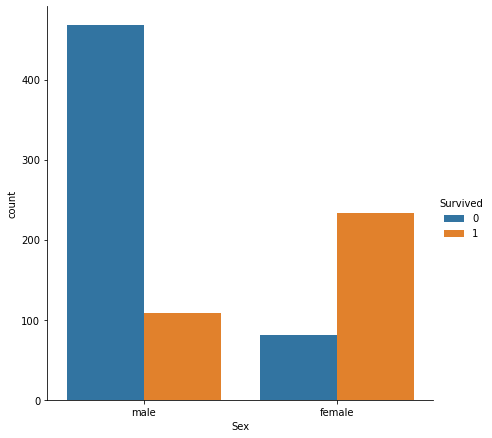

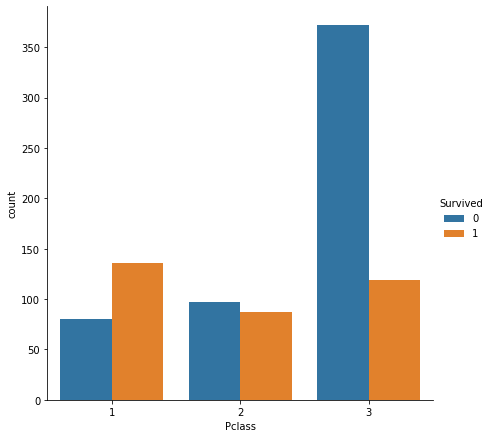

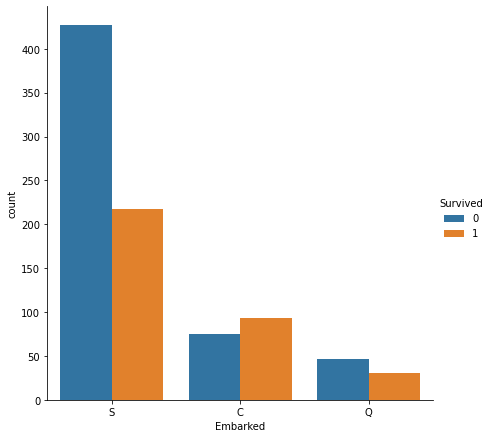

In [19]:
#hue is for further classification plotting, In this case Plot survivied for sex,Pclass,embarked.
print(sns.factorplot(x="Sex", hue="Survived", data=titanic_train, kind="count", size=6) )
print(sns.factorplot(x="Pclass", hue="Survived", data=titanic_train, kind="count", size=6))
sns.factorplot(x="Embarked", hue="Survived", data=titanic_train, kind="count", size=6)


C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


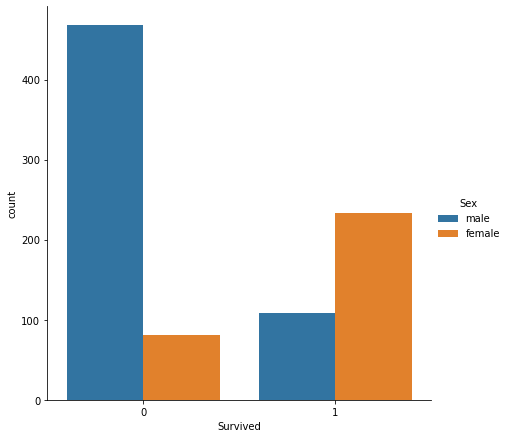

In [24]:

#This plot Sex for Survived 
sns.factorplot(x="Survived", hue="Sex", data=titanic_train, kind="count", size=6)


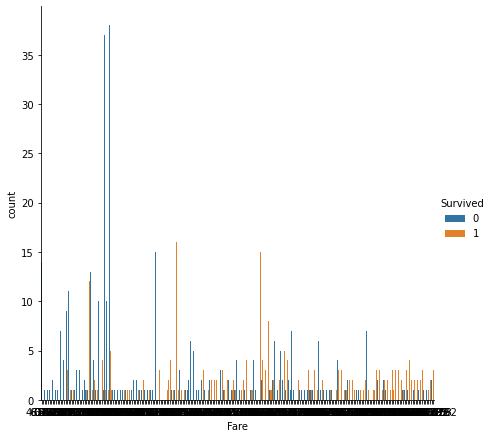

In [27]:
#explore bivariate relationships: categorical vs continuous 
#kind="box", 
sns.factorplot(x="Fare", hue="Survived", data=titanic_train, kind="count", size=6)


C:\Users\harish\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


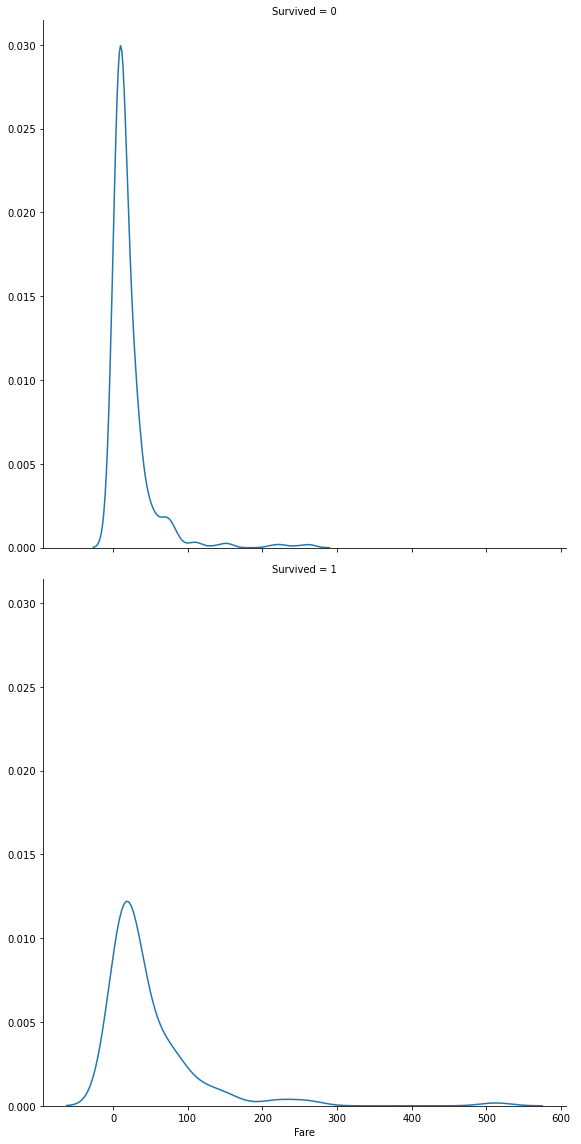

In [28]:
#.map is a inline function like a for loop
#Survived Vs Fare
sns.FacetGrid(titanic_train, row="Survived",size=8).map(sns.kdeplot, "Fare").add_legend()


C:\Users\harish\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


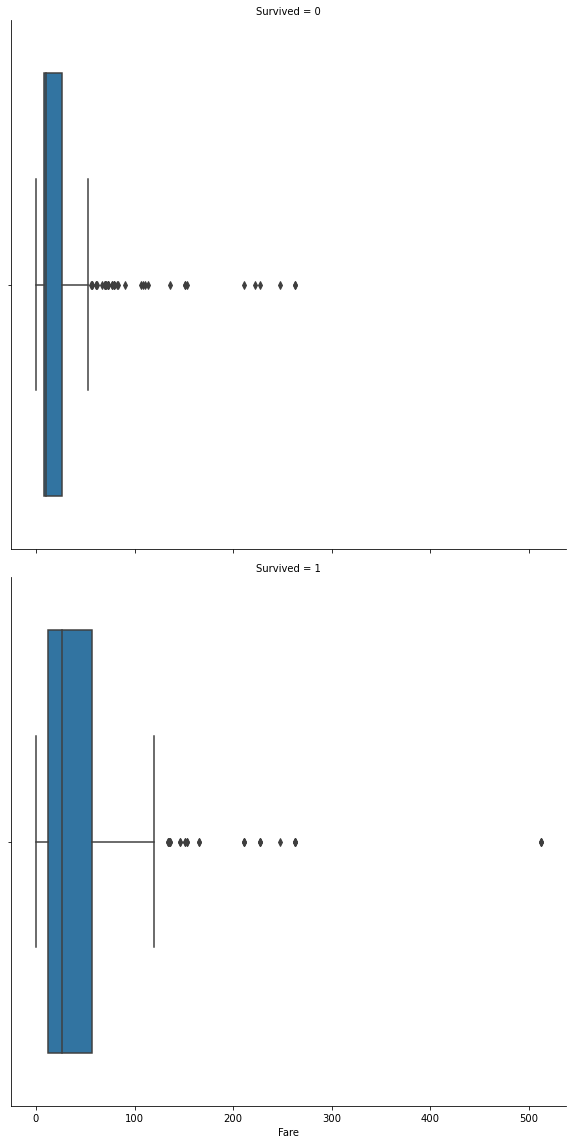

In [29]:
sns.FacetGrid(titanic_train, row="Survived",size=8).map(sns.boxplot, "Fare").add_legend()


C:\Users\harish\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


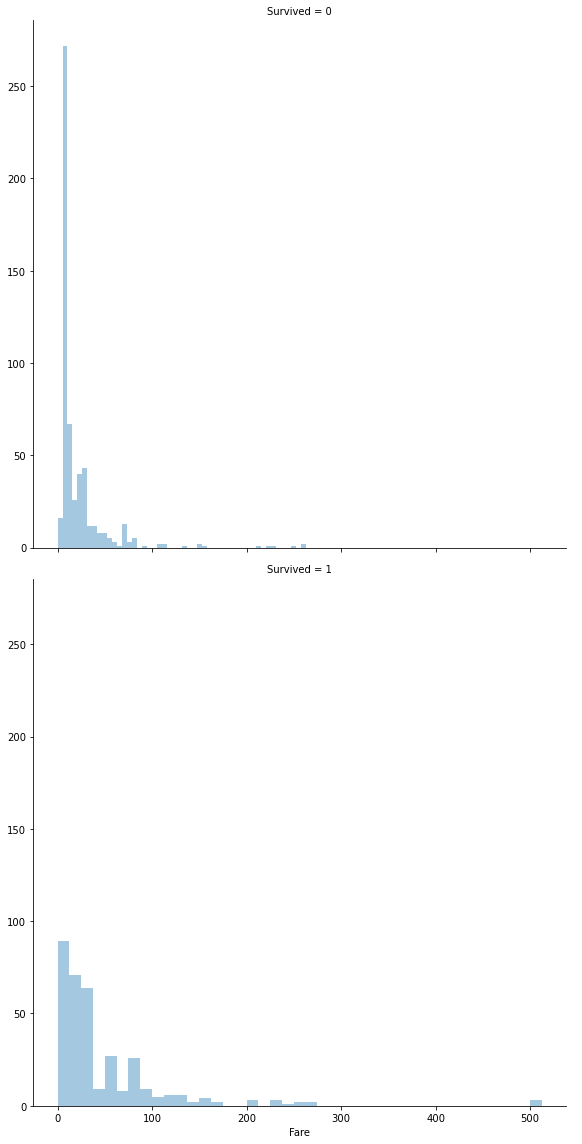

In [39]:
sns.FacetGrid(titanic_train, row="Survived",size=8).map(sns.distplot, "Fare",kde=False).add_legend()

C:\Users\harish\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


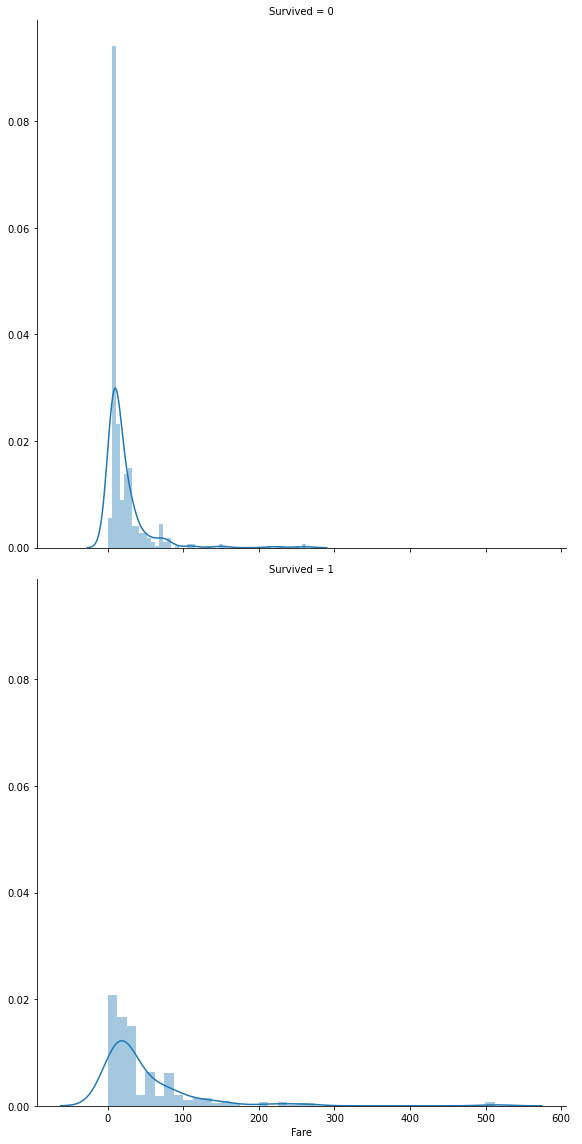

In [33]:
sns.FacetGrid(titanic_train, row="Survived",size=8).map(sns.distplot, "Fare",kde=True).add_legend()


C:\Users\harish\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harish\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


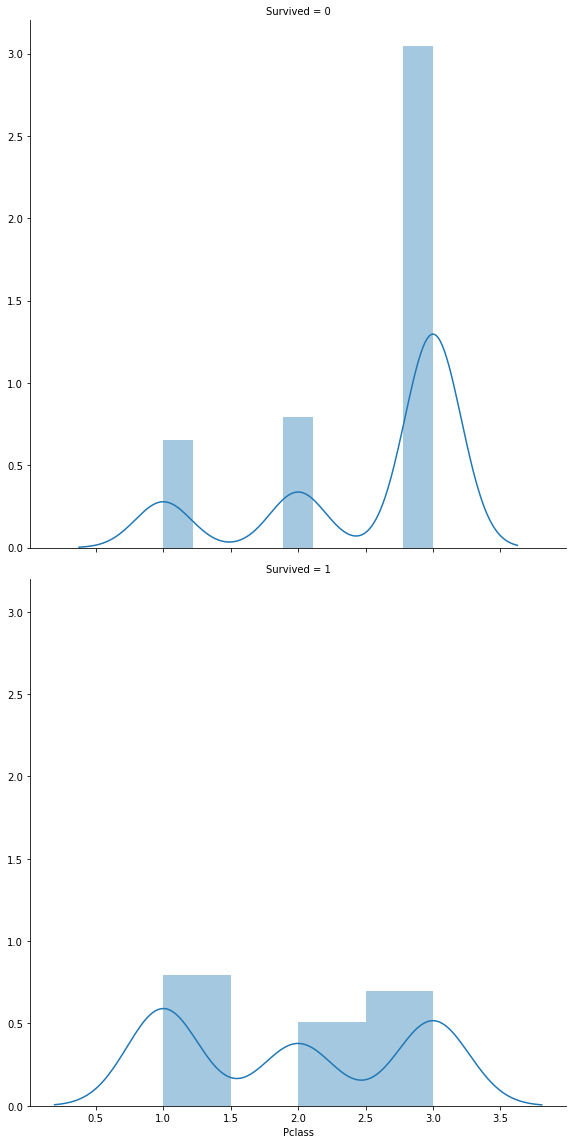

In [41]:
sns.FacetGrid(titanic_train, row="Survived",size=8).map(sns.distplot, "Pclass").add_legend()


In [35]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


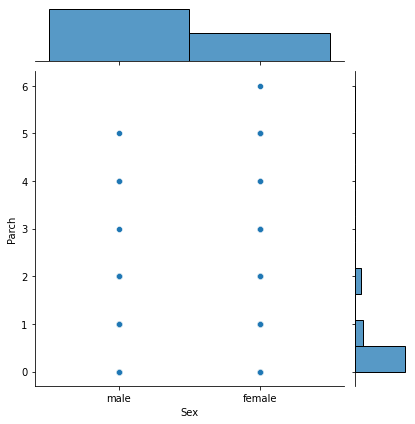

In [44]:
#explore bivariate relationships: categorical vs continuous 
sns.jointplot(x="Sex", y="Parch", data=titanic_train)


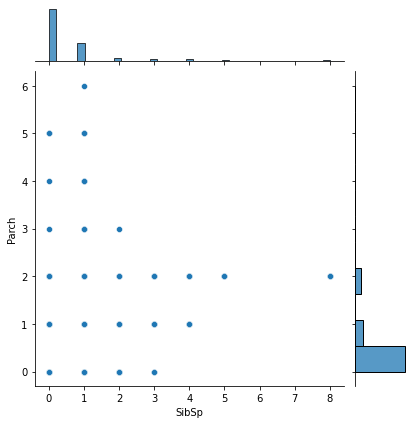

In [46]:
#explore bivariate relationships: continuous vs continuous 
sns.jointplot(x="SibSp", y="Parch", data=titanic_train)